# Lab07-1: Tips
CUAI 허인

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

## Training and Test Datsets

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])


x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

## 모델

In [5]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()

In [24]:
# 함수를 만들자 (훈련, 테스트 모두)
# 그 전에 optimizer 설정

optimizer = optim.SGD(model.parameters(),lr=0.1)

def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x)
        prediction = model(x_train)

        # cost 
        cost = F.cross_entropy(prediction, y_train)

        # cost -> H(x) 
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))
        
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(correct_count / len(y_test) * 100, cost.item()))

In [25]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.895360
Epoch    1/20 Cost: 0.890797
Epoch    2/20 Cost: 0.886333
Epoch    3/20 Cost: 0.881965
Epoch    4/20 Cost: 0.877687
Epoch    5/20 Cost: 0.873499
Epoch    6/20 Cost: 0.869395
Epoch    7/20 Cost: 0.865373
Epoch    8/20 Cost: 0.861432
Epoch    9/20 Cost: 0.857567
Epoch   10/20 Cost: 0.853776
Epoch   11/20 Cost: 0.850057
Epoch   12/20 Cost: 0.846408
Epoch   13/20 Cost: 0.842827
Epoch   14/20 Cost: 0.839311
Epoch   15/20 Cost: 0.835858
Epoch   16/20 Cost: 0.832466
Epoch   17/20 Cost: 0.829135
Epoch   18/20 Cost: 0.825861
Epoch   19/20 Cost: 0.822643


In [26]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.199402


Accuracy: 100%

## Learning Rate
- Gradeitn Descent 에서의 알파 값이고 optimizer에서는 lr값 
- Learning rate 너무 크면 diverge -> cost increases (overshooting)

In [27]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e5)

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 1100707.500000
Epoch    2/20 Cost: 2482261.000000
Epoch    3/20 Cost: 664770.062500
Epoch    4/20 Cost: 1668198.875000
Epoch    5/20 Cost: 748657.500000
Epoch    6/20 Cost: 1353832.500000
Epoch    7/20 Cost: 1790073.750000
Epoch    8/20 Cost: 917895.062500
Epoch    9/20 Cost: 989687.125000
Epoch   10/20 Cost: 990845.000000
Epoch   11/20 Cost: 1585082.625000
Epoch   12/20 Cost: 1265073.750000
Epoch   13/20 Cost: 1149145.000000
Epoch   14/20 Cost: 589766.937500
Epoch   15/20 Cost: 689678.750000
Epoch   16/20 Cost: 983032.562500
Epoch   17/20 Cost: 1265073.875000
Epoch   18/20 Cost: 1686645.000000
Epoch   19/20 Cost: 484999.593750


learning rate 너무 작으면 cost는 거의 줄지 않는다

In [28]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e-10)  #learning rate 조절

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.341574
Epoch    2/20 Cost: 1.341574
Epoch    3/20 Cost: 1.341574
Epoch    4/20 Cost: 1.341574
Epoch    5/20 Cost: 1.341574
Epoch    6/20 Cost: 1.341574
Epoch    7/20 Cost: 1.341574
Epoch    8/20 Cost: 1.341574
Epoch    9/20 Cost: 1.341574
Epoch   10/20 Cost: 1.341574
Epoch   11/20 Cost: 1.341574
Epoch   12/20 Cost: 1.341574
Epoch   13/20 Cost: 1.341574
Epoch   14/20 Cost: 1.341574
Epoch   15/20 Cost: 1.341574
Epoch   16/20 Cost: 1.341574
Epoch   17/20 Cost: 1.341574
Epoch   18/20 Cost: 1.341574
Epoch   19/20 Cost: 1.341574


In [29]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.939317
Epoch    1/20 Cost: 1.887239
Epoch    2/20 Cost: 1.055398
Epoch    3/20 Cost: 0.936401
Epoch    4/20 Cost: 0.917493
Epoch    5/20 Cost: 0.911811
Epoch    6/20 Cost: 0.906384
Epoch    7/20 Cost: 0.901102
Epoch    8/20 Cost: 0.895959
Epoch    9/20 Cost: 0.890947
Epoch   10/20 Cost: 0.886062
Epoch   11/20 Cost: 0.881298
Epoch   12/20 Cost: 0.876650
Epoch   13/20 Cost: 0.872114
Epoch   14/20 Cost: 0.867685
Epoch   15/20 Cost: 0.863359
Epoch   16/20 Cost: 0.859132
Epoch   17/20 Cost: 0.855000
Epoch   18/20 Cost: 0.850961
Epoch   19/20 Cost: 0.847009


## 데이터 전처리
데이터를 zero-center -> normalize

In [30]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [31]:
mu = x_train.mean(dim=0) #평균

sigma = x_train.std(dim=0) #분산에 루트 - 표준편차

norm_x_train = (x_train - mu) / sigma #정규화

print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


normalize + zero center한 X로 학습 후 성능 파악

In [32]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [33]:
#함수 패턴 유사
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 
        prediction = model(x_train)

        # cost 
        cost = F.mse_loss(prediction, y_train)

        # cost-> H(x) 
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [34]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29474.621094
Epoch    1/20 Cost: 18722.042969
Epoch    2/20 Cost: 11941.123047
Epoch    3/20 Cost: 7630.646973
Epoch    4/20 Cost: 4880.463867
Epoch    5/20 Cost: 3122.820068
Epoch    6/20 Cost: 1998.639648
Epoch    7/20 Cost: 1279.363037
Epoch    8/20 Cost: 819.076416
Epoch    9/20 Cost: 524.500732
Epoch   10/20 Cost: 335.968170
Epoch   11/20 Cost: 215.298920
Epoch   12/20 Cost: 138.062103
Epoch   13/20 Cost: 88.621628
Epoch   14/20 Cost: 56.971203
Epoch   15/20 Cost: 36.706795
Epoch   16/20 Cost: 23.729708
Epoch   17/20 Cost: 15.416880
Epoch   18/20 Cost: 10.089440
Epoch   19/20 Cost: 6.672885


cost 감소

## overfitting
학습 데이터만 잘 학습해서 테스트 데이터가 들어오면 좋은 성능이 안 나올 수 있다. 그리하여 다음의 방법을 실시
- 더 많은 학습 데이터
- 더 적은 양의 feature
- regularization

In [36]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 
        prediction = model(x_train)

        # cost 
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)            
        cost += l2_reg

        # cost-> H(x) 
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch+1, nb_epochs, cost.item()))

In [37]:
model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29648.953125
Epoch    2/20 Cost: 18888.650391
Epoch    3/20 Cost: 12114.510742
Epoch    4/20 Cost: 7807.997070
Epoch    5/20 Cost: 5060.242188
Epoch    6/20 Cost: 3304.121582
Epoch    7/20 Cost: 2180.908936
Epoch    8/20 Cost: 1462.253418
Epoch    9/20 Cost: 1002.366821
Epoch   10/20 Cost: 708.049927
Epoch   11/20 Cost: 519.685913
Epoch   12/20 Cost: 399.127502
Epoch   13/20 Cost: 321.964600
Epoch   14/20 Cost: 272.574799
Epoch   15/20 Cost: 240.960114
Epoch   16/20 Cost: 220.721405
Epoch   17/20 Cost: 207.763870
Epoch   18/20 Cost: 199.466415
Epoch   19/20 Cost: 194.151688
Epoch   20/20 Cost: 190.746063


# Lab07-2: mnist_introduction

In [40]:
#!pip install torchvision

  Using cached torchvision-0.10.1-cp38-cp38-win_amd64.whl (936 kB)


In [42]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [44]:
# parameters 설정

training_epochs = 15
batch_size = 100

In [45]:
# MNIST dataset

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



C:\Users\17172\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [46]:
# dataset loader (위에서 parameter 값 설정했음)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [47]:
# MNIST data image of shape 28 * 28 = 784

linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [48]:
# define cost/loss & optimizer

criterion = torch.nn.CrossEntropyLoss().to(device)   
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [49]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534912527
Epoch: 0002 cost = 0.359308660
Epoch: 0003 cost = 0.331088215
Epoch: 0004 cost = 0.316574216
Epoch: 0005 cost = 0.307130307
Epoch: 0006 cost = 0.300207913
Epoch: 0007 cost = 0.294897288
Epoch: 0008 cost = 0.290830463
Epoch: 0009 cost = 0.287419558
Epoch: 0010 cost = 0.284589112
Epoch: 0011 cost = 0.281816244
Epoch: 0012 cost = 0.279919654
Epoch: 0013 cost = 0.277836859
Epoch: 0014 cost = 0.276022315
Epoch: 0015 cost = 0.274443209
Learning finished


Accuracy: 0.8867999911308289
Label:  8
Prediction:  3


C:\Users\17172\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\17172\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


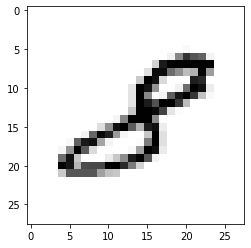

In [50]:
# 테스트 데이터로 모델 테스트 

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

정확도 약 88%